In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

logging.basicConfig(format="%(asctime)s - %(name)s - %(levelname)s - %(message)s", 
                    level=logging.INFO)

In [2]:
OUTPUT_PATH = Path("outputs")
YEAR = 2022

# Reading DataFrame

In [3]:
from utils.dataframe_tools import create_pivot_table_load_energy

df = create_pivot_table_load_energy(f"data/CARGA_ENERGIA_{str(YEAR)}.csv")

# Preprocessing

In [4]:
from utils.dataframe_tools import data_clean, replace_zero_negative

df = data_clean(df)

2023-05-15 16:37:25,077 - root - INFO - Number of NAs values = 0
2023-05-15 16:37:25,078 - root - INFO - Number of negative values in dataframe = 0
2023-05-15 16:37:25,079 - root - INFO - Number of zero values in dataframe = 0
2023-05-15 16:37:25,082 - root - INFO - DataFrame cleaned!


In [5]:
from utils.dataframe_tools import check_date_range_energy_load

In [6]:
## Checking 

In [7]:
check_date_range_energy_load(df.asfreq("D").index, 2022, 2022)

True

## Transforming multi index columns into one column name with the Region names

In [8]:
df.columns = df.columns.droplevel(list(range(0, 2)))

In [9]:
df.head()

nom_subsistema,Norte,Nordeste,Sul,Sudeste/Centro-Oeste
din_instante,,,,
2022-01-01,5036.496958,10017.780333,9892.037917,31543.827292
2022-01-02,5330.572542,10173.424917,10932.618542,33939.796542
2022-01-03,5940.533667,10968.391458,13622.073417,40361.911792
2022-01-04,6025.880792,11422.580917,13947.359333,41904.747625
2022-01-05,6053.980792,11565.056208,13600.000458,42250.066875


## Creating an output path to save the dataframe after preprocessing

In [10]:
from utils.dataframe_tools import save_csv

In [11]:
save_csv(df, path_to_save=OUTPUT_PATH, filename=f"energy_load_curve_{YEAR}")

2023-05-15 16:37:25,179 - root - INFO - Dataframe outputs/energy_load_curve_2022.csv saved!


In [12]:
df = pd.read_csv(os.path.join(OUTPUT_PATH, f"energy_load_curve_{YEAR}.csv"), sep=",", encoding="utf-8")

In [13]:
df.set_index("din_instante", drop=True, inplace=True)

# Visualization

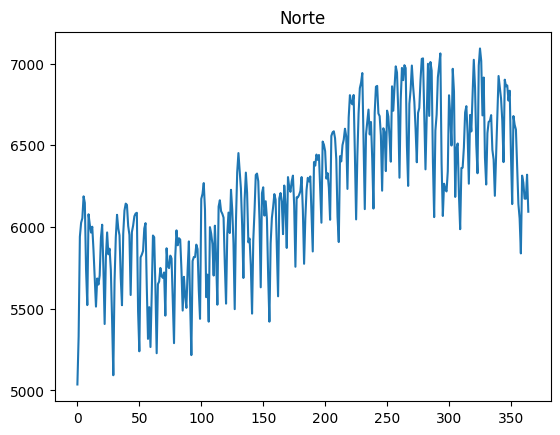

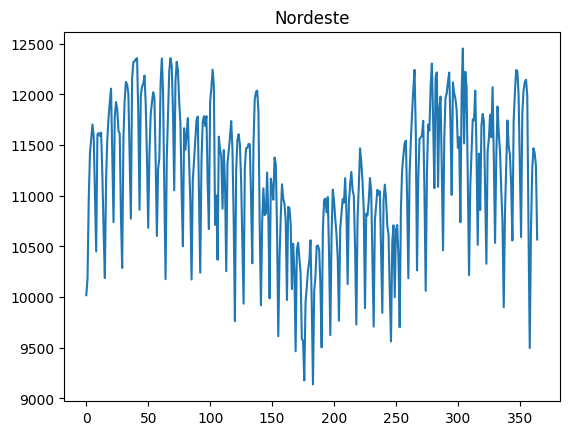

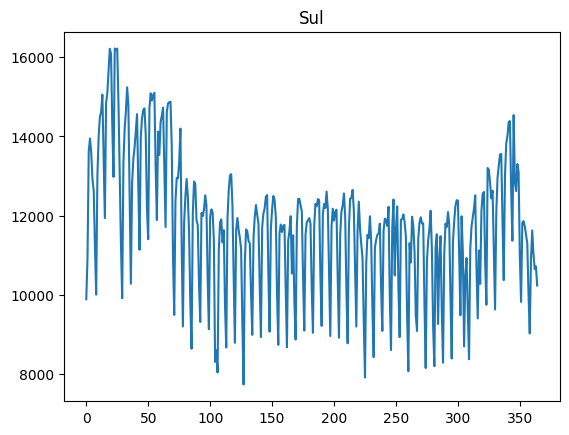

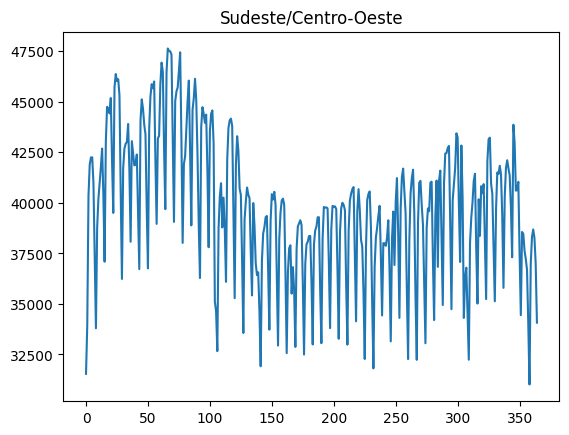

In [14]:
size = len(df.index)
x = np.arange(size)
for region in df.columns:
    plt.title(region)
    plt.plot(x, df[region])
    plt.show()